### EEG Modeling to Predict Six Major Psychiatric Disorders

### 1. Business Understanding

### 2. Load Packages and Data

In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

    Step 1: Understanding the Problem
    Step 2: Data Extraction 
    Step 3: Data Cleaning
    Step 4: Exploratory Data Analysis
    Step 5: Feature Selection
    Step 6: Incorporating Machine Learning Algorithms
    Step 7: Testing the Models 
    Step 8: Deploying the Model



In [356]:
df = pd.read_csv('EEG.machinelearing_data_BRMH.csv')

In [357]:
df.head(10)

no. sex   age    eeg.date  education     IQ       main.disorder  \
0    1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1    2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2    3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3    4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4    5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   
5    6   F  24.0  2012.11.21       14.0  105.0  Addictive disorder   
6    7   F  26.0   2012.12.3       16.0  103.0  Addictive disorder   
7    8   M  23.0   2013.1.17       12.0  104.0  Addictive disorder   
8    9   M  24.0   2013.2.15       17.0   89.0  Addictive disorder   
9   10   F  30.0    2013.2.8       12.0   98.0  Addictive disorder   

      specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  Alcohol use disorder         35.998557         21.717375        21.518280   
1  Alcohol use disorder         13.425118         11.002916        11.942516   
2  Alcohol use disorder         29.941780         27.544684        17.150159   
3  Alcohol use disorder         21.496226         21.846832        17.364316   
4  Alcohol use disorder         37.775667         33.607679        21.865556   
5  Alcohol use disorder         13.482096         14.095855        12.854630   
6  Alcohol use disorder         21.780747         26.655328        17.687564   
7  Alcohol use disorder         11.704212         10.600361         9.208001   
8  Alcohol use disorder          8.531635          8.668278         6.936891   
9  Alcohol use disorder         14.853668         12.614058        21.729442   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        26.825048        26.611516        25.732649        16.563408   
1        15.272216        14.151570        12.456034         8.436832   
2        23.608960        27.087811        13.541237        16.523963   
3        13.833701        14.100954        13.100939        14.613650   
4        21.771413        22.854536        21.456377        15.969042   
5        11.727480        13.128924        11.627138        14.978119   
6        28.340610        34.357498        30.449621        17.911285   
7        16.623509        16.483356        14.705948         9.939374   
8         7.355228         9.103691         7.529840         7.113072   
9        19.998095        17.081762        28.024453        12.010140   

   AB.A.delta.h.T3  AB.A.delta.i.C3  AB.A.delta.j.Cz  AB.A.delta.k.C4  \
0        29.891368        22.402246        22.582176        23.987650   
1         9.975238        14.834740        10.950564        12.742712   
2        12.775574        21.686306        18.367666        20.293571   
3         8.063191        11.015078        11.639560         8.816415   
4         9.434306        15.244523        17.041979        17.712593   
5         6.899770         9.751346        14.141171        16.559389   
6        10.661723        30.532273        32.822336        27.002182   
7         7.620754        17.939082        14.969926        10.368341   
8         4.797183         6.656886         7.869283         6.758727   
9        14.668044        34.792466        20.083606        26.021954   

   AB.A.delta.l.T4  AB.A.delta.m.T5  AB.A.delta.n.P3  AB.A.delta.o.Pz  \
0        14.741769        16.271815        18.376257        16.447620   
1         6.230904        11.238420        14.767063        15.653628   
2        11.946956        11.063130        20.956259        18.946034   
3         8.456443        17.676429         9.959183         9.877650   
4        18.278851        15.449687         9.239752        13.154119   
5         5.996280         9.839662         9.548665         9.048235   
6        11.178315         9.394074        26.768795        25.655639   
7         7.600257         7.670390         9.220199        13.286841   
8         3.720483         3.829535         6.022502         6.506195   
9        10.0

In [358]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [359]:
df.head(5)

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,AB.A.delta.k.C4,AB.A.delta.l.T4,AB.A.delta.m.T5,AB.A.delta.n.P3,AB.A.delta.o.Pz,AB.A.delta.p.P4,AB.A.delta.q.T6,AB.A.delta.r.O1,AB.A.delta.s.O2,AB.B.theta.a.FP1,AB.B.theta.b.FP2,AB.B.theta.c.F7,AB.B.theta.d.F3,AB.B.theta.e.Fz,AB.B.theta.f.F4,AB.B.theta.g.F8,AB.B.theta.h.T3,AB.B.theta.i.C3,AB.B.theta.j.Cz,AB.B.theta.k.C4,AB.B.theta.l.T4,AB.B.theta.m.T5,AB.B.theta.n.P3,AB.B.theta.o.Pz,AB.B.theta.p.P4,AB.B.theta.q.T6,AB.B.theta.r.O1,AB.B.theta.s.O2,AB.C.alpha.a.FP1,AB.C.alpha.b.FP2,AB.C.alpha.c.F7,AB.C.alpha.d.F3,AB.C.alpha.e.Fz,AB.C.alpha.f.F4,AB.C.alpha.g.F8,AB.C.alpha.h.T3,AB.C.alpha.i.C3,AB.C.alpha.j.Cz,AB.C.alpha.k.C4,AB.C.alpha.l.T4,AB.C.alpha.m.T5,AB.C.alpha.n.P3,AB.C.alpha.o.Pz,AB.C.alpha.p.P4,AB.C.alpha.q.T6,AB.C.alpha.r.O1,AB.C.alpha.s.O2,AB.D.beta.a.FP1,AB.D.beta.b.FP2,AB.D.beta.c.F7,AB.D.beta.d.F3,AB.D.beta.e.Fz,AB.D.beta.f.F4,AB.D.beta.g.F8,AB.D.beta.h.T3,AB.D.beta.i.C3,AB.D.beta.j.Cz,AB.D.beta.k.C4,AB.D.beta.l.T4,AB.D.beta.m.T5,AB.D.beta.n.P3,AB.D.beta.o.Pz,AB.D.beta.p.P4,AB.D.beta.q.T6,AB.D.beta.r.O1,AB.D.beta.s.O2,AB.E.highbeta.a.FP1,AB.E.highbeta.b.FP2,AB.E.highbeta.c.F7,AB.E.highbeta.d.F3,AB.E.highbeta.e.Fz,AB.E.highbeta.f.F4,AB.E.highbeta.g.F8,AB.E.highbeta.h.T3,AB.E.highbeta.i.C3,AB.E.highbeta.j.Cz,AB.E.highbeta.k.C4,AB.E.highbeta.l.T4,AB.E.highbeta.m.T5,AB.E.highbeta.n.P3,AB.E.highbeta.o.Pz,AB.E.highbeta.p.P4,AB.E.highbeta.q.T6,AB.E.highbeta.r.O1,AB.E.highbeta.s.O2,AB.F.gamma.a.FP1,AB.F.gamma.b.FP2,AB.F.gamma.c.F7,AB.F.gamma.d.F3,AB.F.gamma.e.Fz,AB.F.gamma.f.F4,AB.F.gamma.g.F8,AB.F.gamma.h.T3,AB.F.gamma.i.C3,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2,Unnamed: 122,COH.A.delta.a.FP1.b.FP2,COH.A.delta.a.FP1.c.F7,COH.A.delta.a.FP1.d.F3,COH.A.delta.a.FP1.e.Fz,COH.A.delta.a.FP1.f.F4,COH.A.delta.a.FP1.g.F8,COH.A.delta.a.FP1.h.T3,COH.A.delta.a.FP1.i.C3,COH.A.delta.a.FP1.j.Cz,COH.A.delta.a.FP1.k.C4,COH.A.delta.a.FP1.l.T4,COH.A.delta.a.FP1.m.T5,COH.A.delta.a.FP1.n.P3,COH.A.delta.a.FP1.o.Pz,COH.A.delta.a.FP1.p.P4,COH.A.delta.a.FP1.q.T6,COH.A.delta.a.FP1.r.O1,COH.A.delta.a.FP1.s.O2,COH.A.delta.b.FP2.c.F7,COH.A.delta.b.FP2.d.F3,COH.A.delta.b.FP2.e.Fz,COH.A.delta.b.FP2.f.F4,COH.A.delta.b.FP2.g.F8,COH.A.delta.b.FP2.h.T3,COH.A.delta.b.FP2.i.C3,COH.A.delta.b.FP2.j.Cz,COH.A.delta.b.FP2.k.C4,COH.A.delta.b.FP2.l.T4,COH.A.delta.b.FP2.m.T5,COH.A.delta.b.FP2.n.P3,COH.A.delta.b.FP2.o.Pz,COH.A.delta.b.FP2.p.P4,COH.A.delta.b.FP2.q.T6,COH.A.delta.b.FP2.r.O1,COH.A.delta.b.FP2.s.O2,COH.A.delta.c.F7.d.F3,COH.A.delta.c.F7.e.Fz,COH.A.delta.c.F7.f.F4,COH.A.delta.c.F7.g.F8,COH.A.delta.c.F7.h.T3,COH.A.delta.c.F7.i.C3,COH.A.delta.c.F7.j.Cz,COH.A.delta.c.F7.k.C4,COH.A.delta.c.F7.l.T4,COH.A.delta.c.F7.m.T5,COH.A.delta.c.F7.n.P3,COH.A.delta.c.F7.o.Pz,COH.A.delta.c.F7.p.P4,COH.A.delta.c.F7.q.T6,COH.A.delta.c.F7.r.O1,COH.A.delta.c.F7.s.O2,COH.A.delta.d.F3.e.Fz,COH.A.delta.d.F3.f.F4,COH.A.delta.d.F3.g.F8,COH.A.delta.d.F3.h.T3,COH.A.delta.d.F3.i.C3,COH.A.delta.d.F3.j.Cz,COH.A.delta.d.F3.k.C4,COH.A.delta.d.F3.l.T4,COH.A.delta.d.F3.m.T5,COH.A.delta.d.F3.n.P3,COH.A.delta.d.F3.o.Pz,COH.A.delta.d.F3.p.P4,COH.A.delta.d.F3.q.T6,COH.A.delta.d.F3.r.O1,COH.A.delta.d.F3.s.O2,COH.A.delta.e.Fz.f.F4,COH.A.delta.e.Fz.g.F8,COH.A.delta.e.Fz.h.T3,COH.A.delta.e.Fz.i.C3,COH.A.delta.e.Fz.j.Cz,COH.A.delta.e.Fz.k.C4,COH.A.delta.e.Fz.l.T4,COH.A.delta.e.Fz.m.T5,COH.A.delta.e.Fz.n.P3,COH.A.delta.e.Fz.o.Pz,COH.A.delta.e.Fz.p.P4,COH.A.delta.e.Fz.q.T6,COH.A.delta.e.Fz.r.O1,COH.A.delta.e.Fz.s.O2,COH.A.delta.f.F4.g.F8,COH.A.delta.f.F4.h.T3,COH.A.delta.f.F4.i.C3,COH.A.delta.f.F4.j.Cz,COH.A.delta.f.F4.k.C4,COH.A.delta.f.F4.l.T4,COH.A.delta.f.F4.m.T5,COH.A.delta.f.F4.n.P3,COH.A.delta.f.F4.o.Pz,COH.A.delta.f.F4.p.P4,COH.A.delta.f.F4.q.T6,COH.A.de

### 3. Data Understanding

#### Describe Data

In [360]:
#Identify missing data
df.isna().sum()

no.                             0
sex                             0
age                             0
eeg.date                        0
education                      15
IQ                             13
main.disorder                   0
specific.disorder               0
AB.A.delta.a.FP1                0
AB.A.delta.b.FP2                0
AB.A.delta.c.F7                 0
AB.A.delta.d.F3                 0
AB.A.delta.e.Fz                 0
AB.A.delta.f.F4                 0
AB.A.delta.g.F8                 0
AB.A.delta.h.T3                 0
AB.A.delta.i.C3                 0
AB.A.delta.j.Cz                 0
AB.A.delta.k.C4                 0
AB.A.delta.l.T4                 0
AB.A.delta.m.T5                 0
AB.A.delta.n.P3                 0
AB.A.delta.o.Pz                 0
AB.A.delta.p.P4                 0
AB.A.delta.q.T6                 0
AB.A.delta.r.O1                 0
AB.A.delta.s.O2                 0
AB.B.theta.a.FP1                0
AB.B.theta.b.FP2                0
AB.B.theta.c.F

In [361]:
#Display datatypes  by feature

print(df.info())
datatypes = df.dtypes
print()
print(datatypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB
None

no.                             int64
sex                            object
age                           float64
eeg.date                       object
education                     float64
IQ                            float64
main.disorder                  object
specific.disorder              object
AB.A.delta.a.FP1              float64
AB.A.delta.b.FP2              float64
AB.A.delta.c.F7               float64
AB.A.delta.d.F3               float64
AB.A.delta.e.Fz               float64
AB.A.delta.f.F4               float64
AB.A.delta.g.F8               float64
AB.A.delta.h.T3               float64
AB.A.delta.i.C3               float64
AB.A.delta.j.Cz               float64
AB.A.delta.k.C4               float64
AB.A.delta.l.T4               float64
AB.A.delta.m.T5               float64
AB.A.de

In [362]:
# print shape of data
print ('Shape of the data: Rows x Columns', df.shape)

Shape of the data: Rows x Columns (945, 1149)


In [363]:
# Pull summary descriptive stats for dataframe
df.describe()

no.         age   education          IQ  AB.A.delta.a.FP1  \
count  945.000000  945.000000  930.000000  932.000000        945.000000   
mean   473.000000   30.594804   13.438710  101.580472         20.182936   
std    272.942302   11.781592    2.550461   17.022414         11.282022   
min      1.000000   18.000000    0.000000   49.000000          3.272260   
25%    237.000000   21.730000   12.000000   91.000000         12.784872   
50%    473.000000   26.150000   13.000000  102.000000         17.065286   
75%    709.000000   35.450000   16.000000  114.000000         24.492760   
max    945.000000   71.880000   20.000000  145.000000         92.826192   

       AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  AB.A.delta.e.Fz  \
count        945.000000       945.000000       945.000000       945.000000   
mean          21.177584        17.749553        18.901698        20.447079   
std           12.230662        10.003598         9.079482         9.742912   
min            3.244199         3.050507         3.412618         5.066593   
25%           13.019269        11.134327        12.460586        13.548645   
50%           17.838251        15.541469        16.733004        18.065276   
75%           25.654394        21.623961        23.347900        25.573096   
max          101.515687        91.373456        82.544167       101.566662   

       AB.A.delta.f.F4  AB.A.delta.g.F8  AB.A.delta.h.T3  AB.A.delta.i.C3  \
count       945.000000       945.000000       945.000000       945.000000   
mean         19.490329        17.042218        11.790176        16.405732   
std           9.252500         9.272096         7.347929         8.246200   
min           4.048931         2.552213         2.128977         2.213470   
25%          12.637717        10.381770         7.042545        10.686639   
50%          17.432568        15.050377        10.044354        14.525494   
75%          23.956748        20.810308        14.246874        20.271380   
max          77.197502        69.071230        77.283412        65.932521   

       AB.A.delta.j.Cz  AB.A.delta.k.C4  AB.A.delta.l.T4  AB.A.delta.m.T5  \
count       945.000000       945.000000       945.000000       945.000000   
mean         19.566879        17.170369        12.303086        10.937286   
std           9.525142         8.450513         7.399613         7.268041   
min           3.149313         2.421924         1.899937         0.377075   
25%          13.130418        11.138735         7.377093         6.129184   
50%          17.245633        15.379709        10.393380         9.016449   
75%          23.792159        21.160179        14.891855        13.268871   
max          88.474026        65.449609        58.976481        59.076361   

       AB.A.delta.n.P3  AB.A.delta.o.Pz  AB.A.delta.p.P4  AB.A.delta.q.T6  \
count       945.000000       945.000000       945.000000       945.000000   
mean         14.891539        17.023643        16.211828        13.111305   
std           8.576411         9.456696         8.949209         8.752174   
min           3.010977         3.441543         2.653825         1.959439   
25%           9.117581        10.756015         9.980880         7.249005   
50%          12.605893        14.833858        13.963608        11.044359   
75%          18.806315        20.986275        20.188738        16.038445   
max          83.137188        93.898427        90.628374        68.939248   

       AB.A.delta.r.O1  AB.A.delta.s.O2  AB.B.theta.a.FP1  AB.B.theta.b.FP2  \
count       945.000000       945.000000        945.000000        945.000000   
mean         12.702477        12.969796         13.715181         14.293441   
std           8.874212         8.719749         10.257616         10.837731   
min           1.584043         1.774151          2.781916          2.727408   
25%           6.763807         7.215741          7.934988          8.252628   
50%          10.360117        10.752521         11.272977         11.719087   


#### Value counts for dataframe

In [364]:
# Gender counts
df['sex'].value_counts()

M    601
F    344
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='Count'>

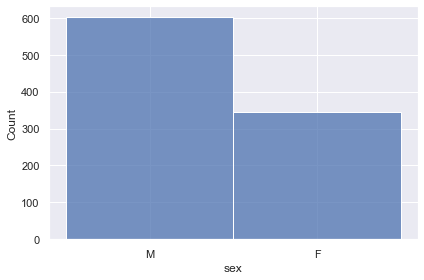

In [365]:
# Plot records by gender
fig = plt.figure(figsize = (6,4))

sns.histplot(df['sex'])

In [366]:
# Main disorder 
df['main.disorder'].value_counts()

Mood disorder                         266
Addictive disorder                    186
Trauma and stress related disorder    128
Schizophrenia                         117
Anxiety disorder                      107
Healthy control                        95
Obsessive compulsive disorder          46
Name: main.disorder, dtype: int64

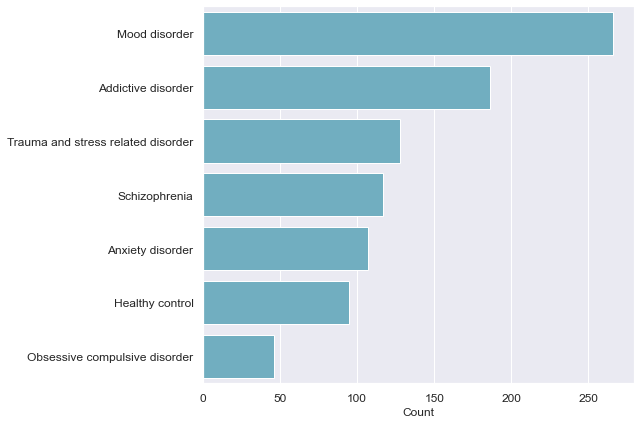

In [367]:
#Plot value counts for main disorders

fig = plt.figure(figsize=(9,6))

sns.countplot(y = 'main.disorder', data = df, color = 'c',
              order = df['main.disorder'].value_counts().index)

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Count', size = 12)
plt.ylabel(None)

plt.show();

In [368]:
# Specific disorder by count
df['specific.disorder'].value_counts()

Depressive disorder               199
Schizophrenia                     117
Healthy control                    95
Alcohol use disorder               93
Behavioral addiction disorder      93
Bipolar disorder                   67
Panic disorder                     59
Posttraumatic stress disorder      52
Social anxiety disorder            48
Obsessive compulsitve disorder     46
Acute stress disorder              38
Adjustment disorder                38
Name: specific.disorder, dtype: int64

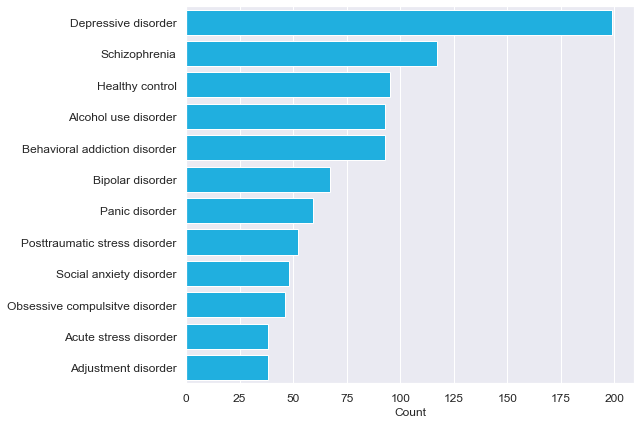

In [369]:
#Plot value counts for specific disorders

fig = plt.figure(figsize=(9,6))

sns.countplot(y = 'specific.disorder', data = df, color = 'deepskyblue',
              order = df['specific.disorder'].value_counts().index)

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Count', size = 12)
plt.ylabel(None)

plt.show();

### Exploratory Data Analysis

##### Patient Background Data - Age, Sex, Education, and IQ Distribution. Compare diagnosis by age, sex, and education

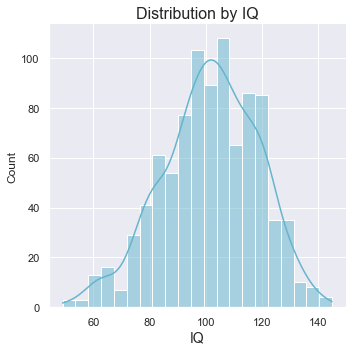

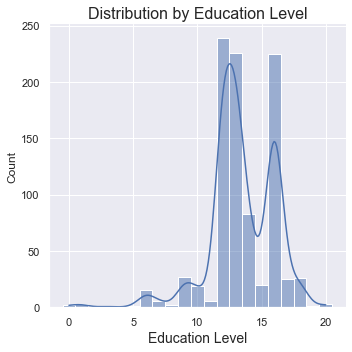

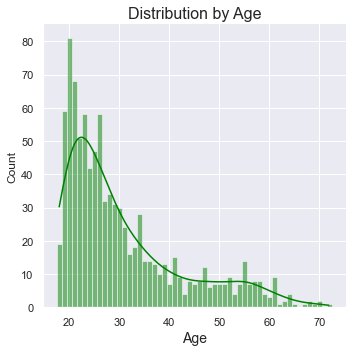

In [370]:
# Check distribution patterns for age, education, and IQ

plt.rcParams["figure.figsize"] = [7.00, 7.00]
plt.rcParams["figure.autolayout"] = True

#IQ
sns.displot(df['IQ'], kde = True, color = 'c')
plt.title('Distribution by IQ', size = 16)
plt.xlabel('IQ', size = 14)

#Education
sns.displot(df['education'], discrete = True, kde = True)
plt.title('Distribution by Education Level', size = 16)
plt.xlabel('Education Level', size = 14)

#Age
sns.displot(df['age'], discrete = True, kde = True, color = 'green')
plt.title('Distribution by Age', size = 16)
plt.xlabel('Age', size = 14)

plt.show();

<Figure size 864x720 with 0 Axes>

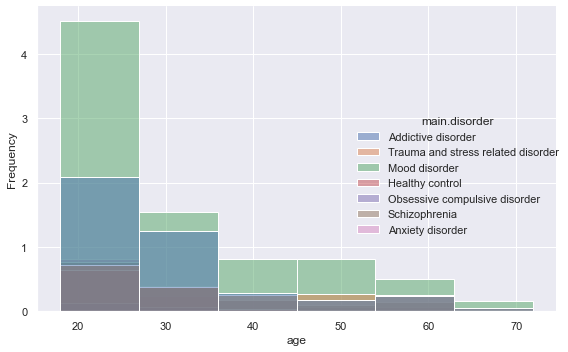

In [371]:
fig = plt.figure(figsize = (12, 10))
sns.displot(data = df, x = df['age'], hue = 'main.disorder', stat = 'frequency', bins = 6)

fig.tight_layout()
plt.show();

<AxesSubplot:xlabel='age', ylabel='Count'>

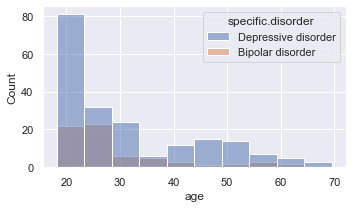

In [372]:
# Add scatterplot showing specific mood disorders by age

df_mood = df.loc[df['main.disorder'].isin(['Mood disorder'])]
fig = plt.figure(figsize=(5,3))
           
sns.histplot(data = df_mood, x = df_mood['age'], hue = 'specific.disorder')

# stacked bargraph for specific disorder by gender

#### Patient EEG Readings - assert number of nodes, number of brainwaves, brainwaves boxplot, brainwaves scatter plots by diagnosis....

1. What do healthy control brainwaves look like?
2. How do healthy control compare to schizophrenia? To mood disorders?
3. For one brainwave what does a scatter plot look like across diagnoses? Another brainwave? 
4. Visualize head healthy control brain against schizophrenia against mood disorders
Refer to literature to guide decisions

#### Node reference - based on the 10-20 system

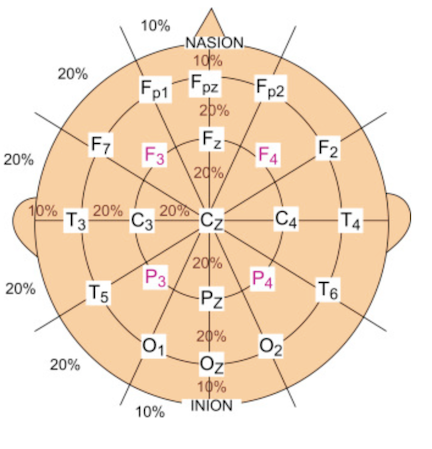

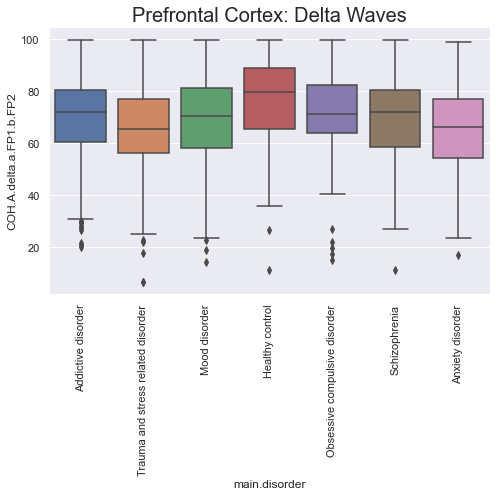

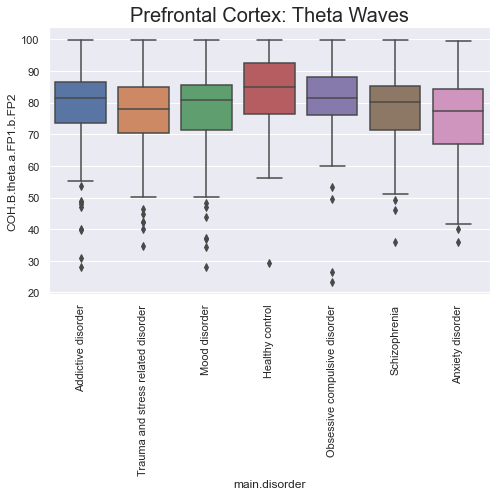

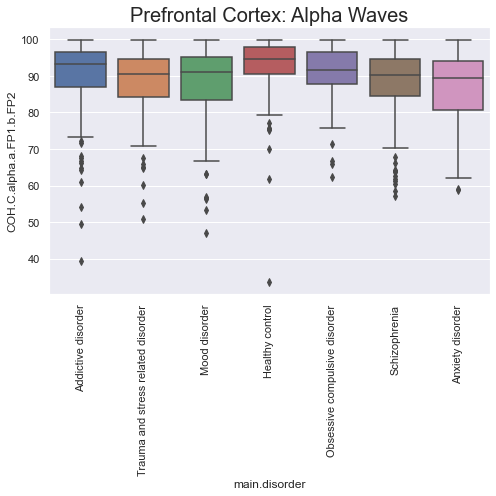

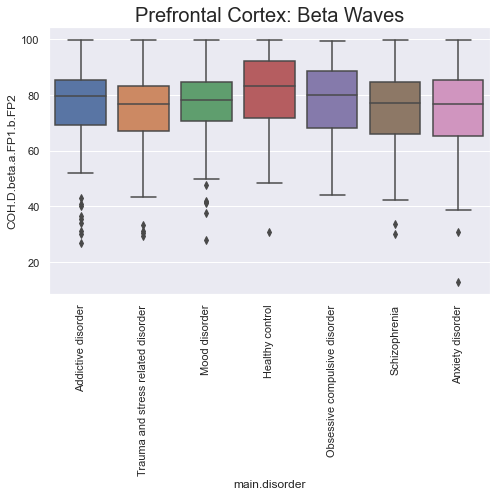

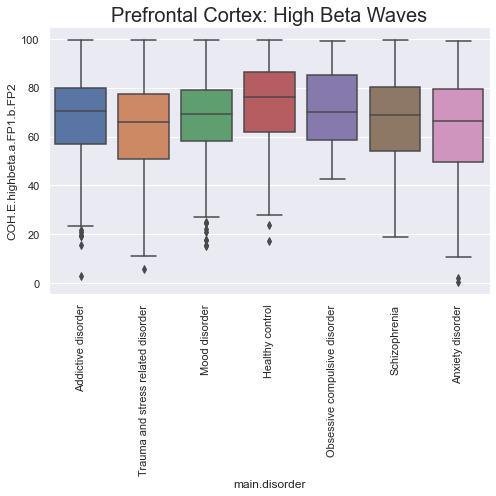

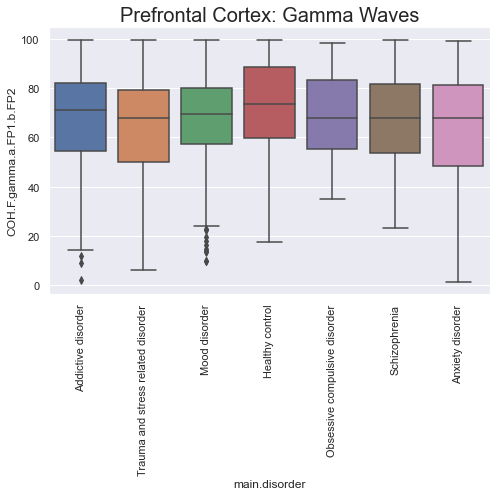

In [373]:
# Boxplot trends for Prefrontal Cortex nodes FP1 and FP2 coherence readings 
# Broken down by the six measured brainwaves

plt.rcParams["figure.figsize"] = [7.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x = df['main.disorder'], y = df['COH.A.delta.a.FP1.b.FP2'])
plt.title('Prefrontal Cortex: Delta Waves', size = 20)
plt.xticks(rotation = 90)
plt.show();

sns.boxplot(x = df['main.disorder'], y = df['COH.B.theta.a.FP1.b.FP2'])
plt.title('Prefrontal Cortex: Theta Waves', size = 20)
plt.xticks(rotation = 90)
plt.show();

sns.boxplot(x = df['main.disorder'], y = df['COH.C.alpha.a.FP1.b.FP2'])
plt.title('Prefrontal Cortex: Alpha Waves', size = 20)
plt.xticks(rotation = 90)
plt.show();

sns.boxplot(x = df['main.disorder'], y = df['COH.D.beta.a.FP1.b.FP2'])
plt.title('Prefrontal Cortex: Beta Waves', size = 20)
plt.xticks(rotation = 90)
plt.show();

sns.boxplot(x = df['main.disorder'], y = df['COH.E.highbeta.a.FP1.b.FP2'])
plt.title('Prefrontal Cortex: High Beta Waves', size = 20)
plt.xticks(rotation = 90)
plt.show();

sns.boxplot(x = df['main.disorder'], y = df['COH.F.gamma.a.FP1.b.FP2'])
plt.title('Prefrontal Cortex: Gamma Waves', size = 20)
plt.xticks(rotation = 90)
plt.show();

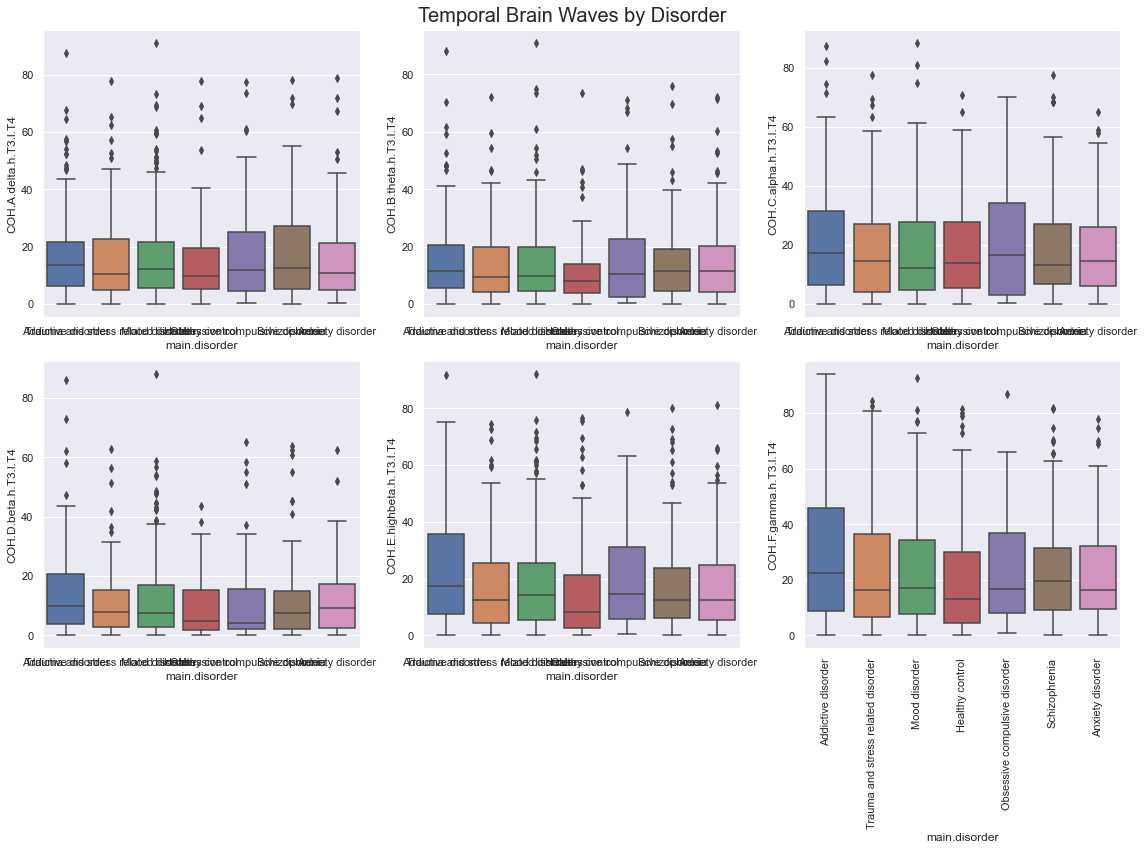

In [374]:
# Boxplots broken down by Temporal Lobes data by brainwave 
fig, ax = plt.subplots(2, 3, figsize = (16,12))   

fig.suptitle ('Temporal Brain Waves by Disorder', size = 20)

sns.boxplot(x = df['main.disorder'], y = df['COH.A.delta.h.T3.l.T4'], ax = ax[0][0])
plt.xticks(rotation = 90)

#plt.title('Temporal Lobes: Delta Waves', size = 20)
#plt.xticks(rotation = 90)

sns.boxplot(x = df['main.disorder'], y = df['COH.B.theta.h.T3.l.T4'], ax = ax[0][1])
#plt.title('Temporal Lobes: Theta Waves', size = 20)
#plt.xticks(rotation = 90)

sns.boxplot(x = df['main.disorder'], y = df['COH.C.alpha.h.T3.l.T4'], ax = ax[0][2])
#plt.title('Temporal Lobes: Alpha Waves', size = 20)
#plt.xticks(rotation = 90)

sns.boxplot(x = df['main.disorder'], y = df['COH.D.beta.h.T3.l.T4'], ax = ax[1][0])
#plt.title('Temporal Lobes: Beta Waves', size = 20)
#plt.xticks(rotation = 90)

sns.boxplot(x = df['main.disorder'], y = df['COH.E.highbeta.h.T3.l.T4'], ax = ax[1][1])
#plt.title('Temporal Lobes: High Beta Waves', size = 20)

sns.boxplot(x = df['main.disorder'], y = df['COH.F.gamma.h.T3.l.T4'], ax = ax[1][2])
plt.xticks(rotation = 90)
#g = sns.boxplot(data=df, x = df['main.disorder'], palette="Set2")
#g.set_xticklabels(g.get_xticklabels(), rotation=90)
#plt.title('Temporal Lobes: Gamma Waves', size = 20)

fig.tight_layout()
plt.show();

In [375]:
# Create dataframe subset for control, schizophrenia and trauma
df_2 = df.loc[df['main.disorder'].isin(['Healthy control', 'Schizophrenia', 'Trauma and stress related disorder'])]

df_2.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,AB.A.delta.k.C4,AB.A.delta.l.T4,AB.A.delta.m.T5,AB.A.delta.n.P3,AB.A.delta.o.Pz,AB.A.delta.p.P4,AB.A.delta.q.T6,AB.A.delta.r.O1,AB.A.delta.s.O2,AB.B.theta.a.FP1,AB.B.theta.b.FP2,AB.B.theta.c.F7,AB.B.theta.d.F3,AB.B.theta.e.Fz,AB.B.theta.f.F4,AB.B.theta.g.F8,AB.B.theta.h.T3,AB.B.theta.i.C3,AB.B.theta.j.Cz,AB.B.theta.k.C4,AB.B.theta.l.T4,AB.B.theta.m.T5,AB.B.theta.n.P3,AB.B.theta.o.Pz,AB.B.theta.p.P4,AB.B.theta.q.T6,AB.B.theta.r.O1,AB.B.theta.s.O2,AB.C.alpha.a.FP1,AB.C.alpha.b.FP2,AB.C.alpha.c.F7,AB.C.alpha.d.F3,AB.C.alpha.e.Fz,AB.C.alpha.f.F4,AB.C.alpha.g.F8,AB.C.alpha.h.T3,AB.C.alpha.i.C3,AB.C.alpha.j.Cz,AB.C.alpha.k.C4,AB.C.alpha.l.T4,AB.C.alpha.m.T5,AB.C.alpha.n.P3,AB.C.alpha.o.Pz,AB.C.alpha.p.P4,AB.C.alpha.q.T6,AB.C.alpha.r.O1,AB.C.alpha.s.O2,AB.D.beta.a.FP1,AB.D.beta.b.FP2,AB.D.beta.c.F7,AB.D.beta.d.F3,AB.D.beta.e.Fz,AB.D.beta.f.F4,AB.D.beta.g.F8,AB.D.beta.h.T3,AB.D.beta.i.C3,AB.D.beta.j.Cz,AB.D.beta.k.C4,AB.D.beta.l.T4,AB.D.beta.m.T5,AB.D.beta.n.P3,AB.D.beta.o.Pz,AB.D.beta.p.P4,AB.D.beta.q.T6,AB.D.beta.r.O1,AB.D.beta.s.O2,AB.E.highbeta.a.FP1,AB.E.highbeta.b.FP2,AB.E.highbeta.c.F7,AB.E.highbeta.d.F3,AB.E.highbeta.e.Fz,AB.E.highbeta.f.F4,AB.E.highbeta.g.F8,AB.E.highbeta.h.T3,AB.E.highbeta.i.C3,AB.E.highbeta.j.Cz,AB.E.highbeta.k.C4,AB.E.highbeta.l.T4,AB.E.highbeta.m.T5,AB.E.highbeta.n.P3,AB.E.highbeta.o.Pz,AB.E.highbeta.p.P4,AB.E.highbeta.q.T6,AB.E.highbeta.r.O1,AB.E.highbeta.s.O2,AB.F.gamma.a.FP1,AB.F.gamma.b.FP2,AB.F.gamma.c.F7,AB.F.gamma.d.F3,AB.F.gamma.e.Fz,AB.F.gamma.f.F4,AB.F.gamma.g.F8,AB.F.gamma.h.T3,AB.F.gamma.i.C3,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2,Unnamed: 122,COH.A.delta.a.FP1.b.FP2,COH.A.delta.a.FP1.c.F7,COH.A.delta.a.FP1.d.F3,COH.A.delta.a.FP1.e.Fz,COH.A.delta.a.FP1.f.F4,COH.A.delta.a.FP1.g.F8,COH.A.delta.a.FP1.h.T3,COH.A.delta.a.FP1.i.C3,COH.A.delta.a.FP1.j.Cz,COH.A.delta.a.FP1.k.C4,COH.A.delta.a.FP1.l.T4,COH.A.delta.a.FP1.m.T5,COH.A.delta.a.FP1.n.P3,COH.A.delta.a.FP1.o.Pz,COH.A.delta.a.FP1.p.P4,COH.A.delta.a.FP1.q.T6,COH.A.delta.a.FP1.r.O1,COH.A.delta.a.FP1.s.O2,COH.A.delta.b.FP2.c.F7,COH.A.delta.b.FP2.d.F3,COH.A.delta.b.FP2.e.Fz,COH.A.delta.b.FP2.f.F4,COH.A.delta.b.FP2.g.F8,COH.A.delta.b.FP2.h.T3,COH.A.delta.b.FP2.i.C3,COH.A.delta.b.FP2.j.Cz,COH.A.delta.b.FP2.k.C4,COH.A.delta.b.FP2.l.T4,COH.A.delta.b.FP2.m.T5,COH.A.delta.b.FP2.n.P3,COH.A.delta.b.FP2.o.Pz,COH.A.delta.b.FP2.p.P4,COH.A.delta.b.FP2.q.T6,COH.A.delta.b.FP2.r.O1,COH.A.delta.b.FP2.s.O2,COH.A.delta.c.F7.d.F3,COH.A.delta.c.F7.e.Fz,COH.A.delta.c.F7.f.F4,COH.A.delta.c.F7.g.F8,COH.A.delta.c.F7.h.T3,COH.A.delta.c.F7.i.C3,COH.A.delta.c.F7.j.Cz,COH.A.delta.c.F7.k.C4,COH.A.delta.c.F7.l.T4,COH.A.delta.c.F7.m.T5,COH.A.delta.c.F7.n.P3,COH.A.delta.c.F7.o.Pz,COH.A.delta.c.F7.p.P4,COH.A.delta.c.F7.q.T6,COH.A.delta.c.F7.r.O1,COH.A.delta.c.F7.s.O2,COH.A.delta.d.F3.e.Fz,COH.A.delta.d.F3.f.F4,COH.A.delta.d.F3.g.F8,COH.A.delta.d.F3.h.T3,COH.A.delta.d.F3.i.C3,COH.A.delta.d.F3.j.Cz,COH.A.delta.d.F3.k.C4,COH.A.delta.d.F3.l.T4,COH.A.delta.d.F3.m.T5,COH.A.delta.d.F3.n.P3,COH.A.delta.d.F3.o.Pz,COH.A.delta.d.F3.p.P4,COH.A.delta.d.F3.q.T6,COH.A.delta.d.F3.r.O1,COH.A.delta.d.F3.s.O2,COH.A.delta.e.Fz.f.F4,COH.A.delta.e.Fz.g.F8,COH.A.delta.e.Fz.h.T3,COH.A.delta.e.Fz.i.C3,COH.A.delta.e.Fz.j.Cz,COH.A.delta.e.Fz.k.C4,COH.A.delta.e.Fz.l.T4,COH.A.delta.e.Fz.m.T5,COH.A.delta.e.Fz.n.P3,COH.A.delta.e.Fz.o.Pz,COH.A.delta.e.Fz.p.P4,COH.A.delta.e.Fz.q.T6,COH.A.delta.e.Fz.r.O1,COH.A.delta.e.Fz.s.O2,COH.A.delta.f.F4.g.F8,COH.A.delta.f.F4.h.T3,COH.A.delta.f.F4.i.C3,COH.A.delta.f.F4.j.Cz,COH.A.delta.f.F4.k.C4,COH.A.delta.f.F4.l.T4,COH.A.delta.f.F4.m.T5,COH.A.delta.f.F4.n.P3,COH.A.delta.f.F4.o.Pz,COH.A.delta.f.F4.p.P4,COH.A.delta.f.F4.q.T6,COH.A.de

In [376]:
# check value counts of new dataframe
df_2['main.disorder'].value_counts()

Trauma and stress related disorder    128
Schizophrenia                         117
Healthy control                        95
Name: main.disorder, dtype: int64

In [377]:
# Print columns for reference
df_2.columns.values.tolist()

['no.',
 'sex',
 'age',
 'eeg.date',
 'education',
 'IQ',
 'main.disorder',
 'specific.disorder',
 'AB.A.delta.a.FP1',
 'AB.A.delta.b.FP2',
 'AB.A.delta.c.F7',
 'AB.A.delta.d.F3',
 'AB.A.delta.e.Fz',
 'AB.A.delta.f.F4',
 'AB.A.delta.g.F8',
 'AB.A.delta.h.T3',
 'AB.A.delta.i.C3',
 'AB.A.delta.j.Cz',
 'AB.A.delta.k.C4',
 'AB.A.delta.l.T4',
 'AB.A.delta.m.T5',
 'AB.A.delta.n.P3',
 'AB.A.delta.o.Pz',
 'AB.A.delta.p.P4',
 'AB.A.delta.q.T6',
 'AB.A.delta.r.O1',
 'AB.A.delta.s.O2',
 'AB.B.theta.a.FP1',
 'AB.B.theta.b.FP2',
 'AB.B.theta.c.F7',
 'AB.B.theta.d.F3',
 'AB.B.theta.e.Fz',
 'AB.B.theta.f.F4',
 'AB.B.theta.g.F8',
 'AB.B.theta.h.T3',
 'AB.B.theta.i.C3',
 'AB.B.theta.j.Cz',
 'AB.B.theta.k.C4',
 'AB.B.theta.l.T4',
 'AB.B.theta.m.T5',
 'AB.B.theta.n.P3',
 'AB.B.theta.o.Pz',
 'AB.B.theta.p.P4',
 'AB.B.theta.q.T6',
 'AB.B.theta.r.O1',
 'AB.B.theta.s.O2',
 'AB.C.alpha.a.FP1',
 'AB.C.alpha.b.FP2',
 'AB.C.alpha.c.F7',
 'AB.C.alpha.d.F3',
 'AB.C.alpha.e.Fz',
 'AB.C.alpha.f.F4',
 'AB.C.alpha.g.F

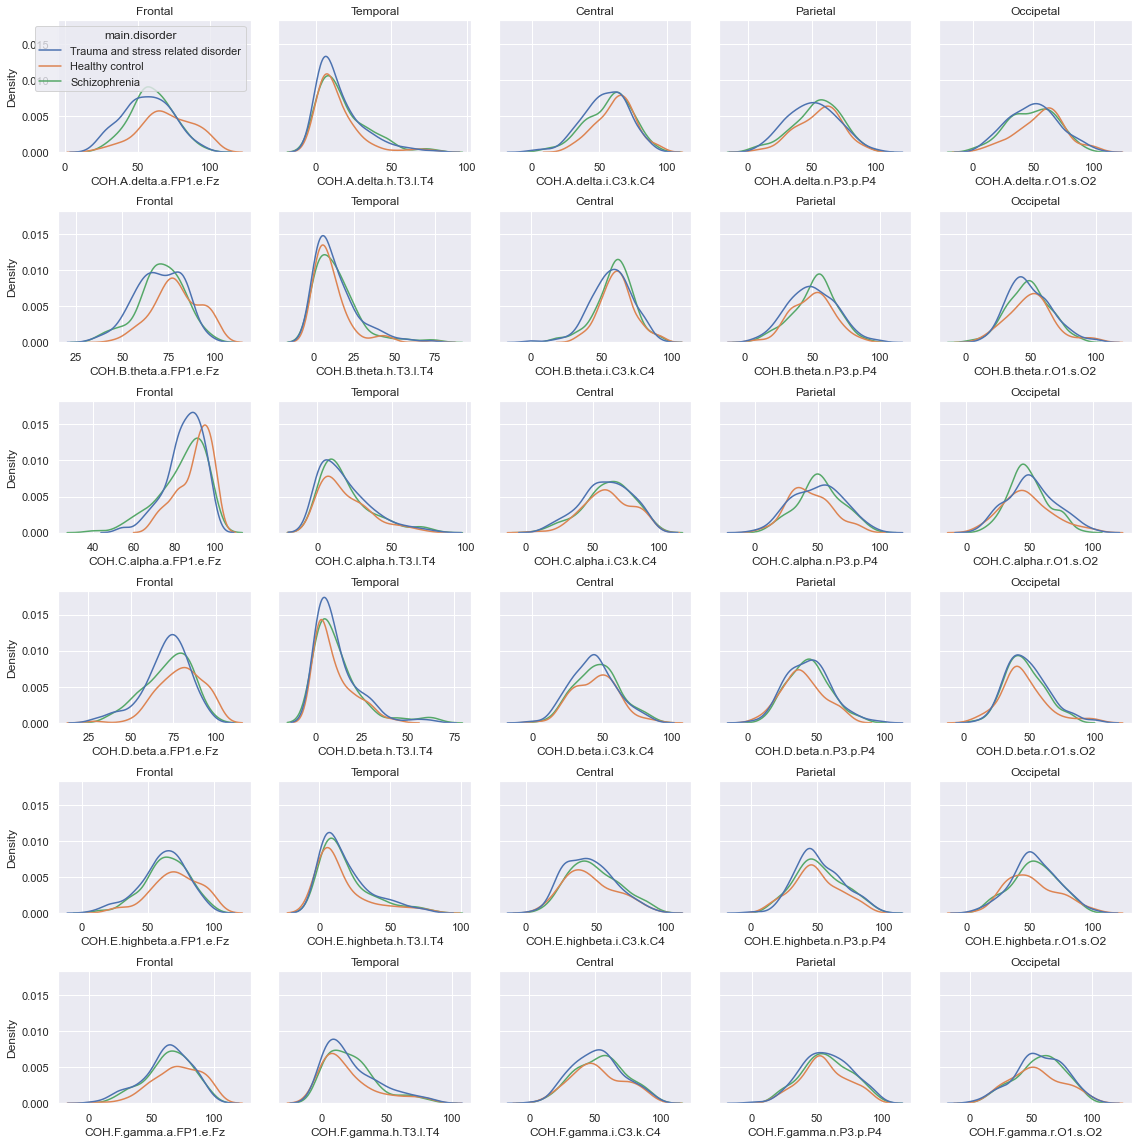

In [378]:
# Density Plot by each brainwave for each major brain region
# Brain Regions: Frontal, Temporal, Central, Parietal, Occipetal

fig, axes = plt.subplots(6, 5, figsize = (16,16), sharey = True)

# Delta (δ)	0.5–4 Hz	Sleep dominant
sns.kdeplot(data = df_2, x="COH.A.delta.a.FP1.e.Fz", hue="main.disorder", cumulative = False, ax = axes[0][0], legend = True).set(title = 'Frontal')
sns.kdeplot(data = df_2, x="COH.A.delta.h.T3.l.T4", hue="main.disorder", cumulative = False, ax = axes[0][1], legend = False).set(title = 'Temporal')
sns.kdeplot(data = df_2, x="COH.A.delta.i.C3.k.C4", hue="main.disorder", cumulative = False, ax = axes[0][2], legend = False).set(title = 'Central')
sns.kdeplot(data = df_2, x="COH.A.delta.n.P3.p.P4", hue="main.disorder", cumulative = False, ax = axes[0][3], legend = False).set(title = 'Parietal')
sns.kdeplot(data = df_2, x="COH.A.delta.r.O1.s.O2", hue="main.disorder", cumulative = False, ax = axes[0][4], legend = False).set(title = 'Occipetal')

# Theta (θ)	4–8 Hz	Deeply relaxed, inward focused
sns.kdeplot(data = df_2, x="COH.B.theta.a.FP1.e.Fz", hue="main.disorder", cumulative = False, ax = axes[1][0], legend = False).set(title = 'Frontal')
sns.kdeplot(data = df_2, x="COH.B.theta.h.T3.l.T4", hue="main.disorder", cumulative = False, ax = axes[1][1], legend = False).set(title = 'Temporal')
sns.kdeplot(data = df_2, x="COH.B.theta.i.C3.k.C4", hue="main.disorder", cumulative = False, ax = axes[1][2], legend = False).set(title = 'Central')
sns.kdeplot(data = df_2, x="COH.B.theta.n.P3.p.P4", hue="main.disorder", cumulative = False, ax = axes[1][3], legend = False).set(title = 'Parietal')
sns.kdeplot(data = df_2, x="COH.B.theta.r.O1.s.O2", hue="main.disorder", cumulative = False, ax = axes[1][4], legend = False).set(title = 'Occipetal')

# Alpha (α)	8–12 Hz	Very relaxed, passive attention
sns.kdeplot(data = df_2, x="COH.C.alpha.a.FP1.e.Fz", hue="main.disorder", cumulative = False, ax = axes[2][0], legend = False).set(title = 'Frontal')
sns.kdeplot(data = df_2, x="COH.C.alpha.h.T3.l.T4", hue="main.disorder", cumulative = False, ax = axes[2][1], legend = False).set(title = 'Temporal')
sns.kdeplot(data = df_2, x="COH.C.alpha.i.C3.k.C4", hue="main.disorder", cumulative = False, ax = axes[2][2], legend = False).set(title = 'Central')
sns.kdeplot(data = df_2, x="COH.C.alpha.n.P3.p.P4", hue="main.disorder", cumulative = False, ax = axes[2][3], legend = False).set(title = 'Parietal')
sns.kdeplot(data = df_2, x="COH.C.alpha.r.O1.s.O2", hue="main.disorder", cumulative = False, ax = axes[2][4], legend = False).set(title = 'Occipetal')

# Beta (β)	12–35 Hz  Anxiety dominant, active, external attention, relaxed
sns.kdeplot(data = df_2, x="COH.D.beta.a.FP1.e.Fz", hue="main.disorder", cumulative = False, ax = axes[3][0], legend = False).set(title = 'Frontal')
sns.kdeplot(data = df_2, x="COH.D.beta.h.T3.l.T4", hue="main.disorder", cumulative = False, ax = axes[3][1], legend = False).set(title = 'Temporal')
sns.kdeplot(data = df_2, x="COH.D.beta.i.C3.k.C4", hue="main.disorder", cumulative = False, ax = axes[3][2], legend = False).set(title = 'Central')
sns.kdeplot(data = df_2, x="COH.D.beta.n.P3.p.P4", hue="main.disorder", cumulative = False, ax = axes[3][3], legend = False).set(title = 'Parietal')
sns.kdeplot(data = df_2, x="COH.D.beta.r.O1.s.O2", hue="main.disorder", cumulative = False, ax = axes[3][4], legend = False).set(title = 'Occipetal')

# High beta
sns.kdeplot(data = df_2, x="COH.E.highbeta.a.FP1.e.Fz", hue="main.disorder", cumulative = False, ax = axes[4][0], legend = False).set(title = 'Frontal')
sns.kdeplot(data = df_2, x="COH.E.highbeta.h.T3.l.T4", hue="main.disorder", cumulative = False, ax = axes[4][1], legend = False).set(title = 'Temporal')
sns.kdeplot(data = df_2, x="COH.E.highbeta.i.C3.k.C4", hue="main.disorder", cumulative = False, ax = axes[4][2], legend = False).set(title = 'Central')
sns.kdeplot(data = df_2, x="COH.E.highbeta.n.P3.p.P4", hue="main.disorder", cumulative = False, ax = axes[4][3], legend = False).set(title = 'Parietal')
sns.kdeplot(data = df_2, x="COH.E.highbeta.r.O1.s.O2", hue="main.disorder", cumulative = False, ax = axes[4][4], legend = False).set(title = 'Occipetal')

# Gamma (γ)	35 Hz and greater 	Concentration
sns.kdeplot(data = df_2, x="COH.F.gamma.a.FP1.e.Fz", hue="main.disorder", cumulative = False, ax = axes[5][0], legend = False).set(title = 'Frontal')
sns.kdeplot(data = df_2, x="COH.F.gamma.h.T3.l.T4", hue="main.disorder", cumulative = False, ax = axes[5][1], legend = False).set(title = 'Temporal')
sns.kdeplot(data = df_2, x="COH.F.gamma.i.C3.k.C4", hue="main.disorder", cumulative = False, ax = axes[5][2], legend = False).set(title = 'Central')
sns.kdeplot(data = df_2, x="COH.F.gamma.n.P3.p.P4", hue="main.disorder", cumulative = False, ax = axes[5][3], legend = False).set(title = 'Parietal')
sns.kdeplot(data = df_2, x="COH.F.gamma.r.O1.s.O2", hue="main.disorder", cumulative = False, ax = axes[5][4], legend = False).set(title = 'Occipetal')

plt.tight_layout();

#### Brief Summary of EDA
1. Patient stats
2. patient EEG readings
3. Scaling of data
4. EEG reading trends overall
5. EEG readings for subset

### 4. Preprocessing data 
1. Plan for missing data
2. Drop unnecessary rows
3. Split data into target and data
4. Make plan to balance targets - balanced in SMOTE
5. Convert male - female into binary
6. Make all data numeric if possible

In [379]:
# Drop columns from feature list: no., date, and Unnamed: 122
# Drop specific disorder to avoid multicollinearity with Main disorder

data = df.drop(['no.', 'eeg.date', 'specific.disorder', 'Unnamed: 122'], axis = 1)
data.head()

,sex,age,education,IQ,main.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,AB.A.delta.k.C4,AB.A.delta.l.T4,AB.A.delta.m.T5,AB.A.delta.n.P3,AB.A.delta.o.Pz,AB.A.delta.p.P4,AB.A.delta.q.T6,AB.A.delta.r.O1,AB.A.delta.s.O2,AB.B.theta.a.FP1,AB.B.theta.b.FP2,AB.B.theta.c.F7,AB.B.theta.d.F3,AB.B.theta.e.Fz,AB.B.theta.f.F4,AB.B.theta.g.F8,AB.B.theta.h.T3,AB.B.theta.i.C3,AB.B.theta.j.Cz,AB.B.theta.k.C4,AB.B.theta.l.T4,AB.B.theta.m.T5,AB.B.theta.n.P3,AB.B.theta.o.Pz,AB.B.theta.p.P4,AB.B.theta.q.T6,AB.B.theta.r.O1,AB.B.theta.s.O2,AB.C.alpha.a.FP1,AB.C.alpha.b.FP2,AB.C.alpha.c.F7,AB.C.alpha.d.F3,AB.C.alpha.e.Fz,AB.C.alpha.f.F4,AB.C.alpha.g.F8,AB.C.alpha.h.T3,AB.C.alpha.i.C3,AB.C.alpha.j.Cz,AB.C.alpha.k.C4,AB.C.alpha.l.T4,AB.C.alpha.m.T5,AB.C.alpha.n.P3,AB.C.alpha.o.Pz,AB.C.alpha.p.P4,AB.C.alpha.q.T6,AB.C.alpha.r.O1,AB.C.alpha.s.O2,AB.D.beta.a.FP1,AB.D.beta.b.FP2,AB.D.beta.c.F7,AB.D.beta.d.F3,AB.D.beta.e.Fz,AB.D.beta.f.F4,AB.D.beta.g.F8,AB.D.beta.h.T3,AB.D.beta.i.C3,AB.D.beta.j.Cz,AB.D.beta.k.C4,AB.D.beta.l.T4,AB.D.beta.m.T5,AB.D.beta.n.P3,AB.D.beta.o.Pz,AB.D.beta.p.P4,AB.D.beta.q.T6,AB.D.beta.r.O1,AB.D.beta.s.O2,AB.E.highbeta.a.FP1,AB.E.highbeta.b.FP2,AB.E.highbeta.c.F7,AB.E.highbeta.d.F3,AB.E.highbeta.e.Fz,AB.E.highbeta.f.F4,AB.E.highbeta.g.F8,AB.E.highbeta.h.T3,AB.E.highbeta.i.C3,AB.E.highbeta.j.Cz,AB.E.highbeta.k.C4,AB.E.highbeta.l.T4,AB.E.highbeta.m.T5,AB.E.highbeta.n.P3,AB.E.highbeta.o.Pz,AB.E.highbeta.p.P4,AB.E.highbeta.q.T6,AB.E.highbeta.r.O1,AB.E.highbeta.s.O2,AB.F.gamma.a.FP1,AB.F.gamma.b.FP2,AB.F.gamma.c.F7,AB.F.gamma.d.F3,AB.F.gamma.e.Fz,AB.F.gamma.f.F4,AB.F.gamma.g.F8,AB.F.gamma.h.T3,AB.F.gamma.i.C3,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2,COH.A.delta.a.FP1.b.FP2,COH.A.delta.a.FP1.c.F7,COH.A.delta.a.FP1.d.F3,COH.A.delta.a.FP1.e.Fz,COH.A.delta.a.FP1.f.F4,COH.A.delta.a.FP1.g.F8,COH.A.delta.a.FP1.h.T3,COH.A.delta.a.FP1.i.C3,COH.A.delta.a.FP1.j.Cz,COH.A.delta.a.FP1.k.C4,COH.A.delta.a.FP1.l.T4,COH.A.delta.a.FP1.m.T5,COH.A.delta.a.FP1.n.P3,COH.A.delta.a.FP1.o.Pz,COH.A.delta.a.FP1.p.P4,COH.A.delta.a.FP1.q.T6,COH.A.delta.a.FP1.r.O1,COH.A.delta.a.FP1.s.O2,COH.A.delta.b.FP2.c.F7,COH.A.delta.b.FP2.d.F3,COH.A.delta.b.FP2.e.Fz,COH.A.delta.b.FP2.f.F4,COH.A.delta.b.FP2.g.F8,COH.A.delta.b.FP2.h.T3,COH.A.delta.b.FP2.i.C3,COH.A.delta.b.FP2.j.Cz,COH.A.delta.b.FP2.k.C4,COH.A.delta.b.FP2.l.T4,COH.A.delta.b.FP2.m.T5,COH.A.delta.b.FP2.n.P3,COH.A.delta.b.FP2.o.Pz,COH.A.delta.b.FP2.p.P4,COH.A.delta.b.FP2.q.T6,COH.A.delta.b.FP2.r.O1,COH.A.delta.b.FP2.s.O2,COH.A.delta.c.F7.d.F3,COH.A.delta.c.F7.e.Fz,COH.A.delta.c.F7.f.F4,COH.A.delta.c.F7.g.F8,COH.A.delta.c.F7.h.T3,COH.A.delta.c.F7.i.C3,COH.A.delta.c.F7.j.Cz,COH.A.delta.c.F7.k.C4,COH.A.delta.c.F7.l.T4,COH.A.delta.c.F7.m.T5,COH.A.delta.c.F7.n.P3,COH.A.delta.c.F7.o.Pz,COH.A.delta.c.F7.p.P4,COH.A.delta.c.F7.q.T6,COH.A.delta.c.F7.r.O1,COH.A.delta.c.F7.s.O2,COH.A.delta.d.F3.e.Fz,COH.A.delta.d.F3.f.F4,COH.A.delta.d.F3.g.F8,COH.A.delta.d.F3.h.T3,COH.A.delta.d.F3.i.C3,COH.A.delta.d.F3.j.Cz,COH.A.delta.d.F3.k.C4,COH.A.delta.d.F3.l.T4,COH.A.delta.d.F3.m.T5,COH.A.delta.d.F3.n.P3,COH.A.delta.d.F3.o.Pz,COH.A.delta.d.F3.p.P4,COH.A.delta.d.F3.q.T6,COH.A.delta.d.F3.r.O1,COH.A.delta.d.F3.s.O2,COH.A.delta.e.Fz.f.F4,COH.A.delta.e.Fz.g.F8,COH.A.delta.e.Fz.h.T3,COH.A.delta.e.Fz.i.C3,COH.A.delta.e.Fz.j.Cz,COH.A.delta.e.Fz.k.C4,COH.A.delta.e.Fz.l.T4,COH.A.delta.e.Fz.m.T5,COH.A.delta.e.Fz.n.P3,COH.A.delta.e.Fz.o.Pz,COH.A.delta.e.Fz.p.P4,COH.A.delta.e.Fz.q.T6,COH.A.delta.e.Fz.r.O1,COH.A.delta.e.Fz.s.O2,COH.A.delta.f.F4.g.F8,COH.A.delta.f.F4.h.T3,COH.A.delta.f.F4.i.C3,COH.A.delta.f.F4.j.Cz,COH.A.delta.f.F4.k.C4,COH.A.delta.f.F4.l.T4,COH.A.delta.f.F4.m.T5,COH.A.delta.f.F4.n.P3,COH.A.delta.f.F4.o.Pz,COH.A.delta.f.F4.p.P4,COH.A.delta.f.F4.q.T6,COH.A.delta.f.F4.r.O1,COH.A.delta.f.F4.s.O2,COH.A.de

In [380]:
# Display column names with missing data

print(data.columns[data.isnull().any()])


Index(['education', 'IQ'], dtype='object')


#### Missing data plan - 
Impute the median for missing values in 'education' and 'IQ' features
#### Object/categorical datatypes encoding plan
One Hot Encode for 'sex' feature.

Target is 'main.disorder'. Use label encoder if needed. 

### Modeling

#### First simple model - unpruned decision tree or KNN model